In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import tensorflow_hub as hub

In [ ]:
pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
pip install transformers

In [ ]:
import transformers
from transformers import AutoModel, BertTokenizerFast
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
true_data = pd.read_csv('/content/gdrive/My Drive/Dataset/True.csv')

In [ ]:
fake_data = pd.read_csv('/content/gdrive/My Drive/Dataset/Fake.csv')

In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_data['Target']=['True']*len(true_data)
fake_data['Target']=['Fake']*len(fake_data)

In [ ]:
data=true_data.append(fake_data).sample(frac=1).reset_index().drop(columns=['index'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA
import tensorflow_hub as hub

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
#from googletrans import Translator
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale range', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [ ]:
cat_tar=pd.get_dummies(data.Target)['Fake']

In [ ]:
label_size = [cat_tar.sum(),len(cat_tar)-cat_tar.sum()]

([<matplotlib.patches.Wedge at 0x7f084b9ab250>,
 [Text(-1.1968727067385088, -0.0865778485782335, 'Fake'),
  Text(1.1968726986325005, 0.08657796063754254, 'True')],
 [Text(-0.6981757455974634, -0.05050374500396954, '52.3%'),
  Text(0.6981757408689586, 0.05050381037189981, '47.7%')])

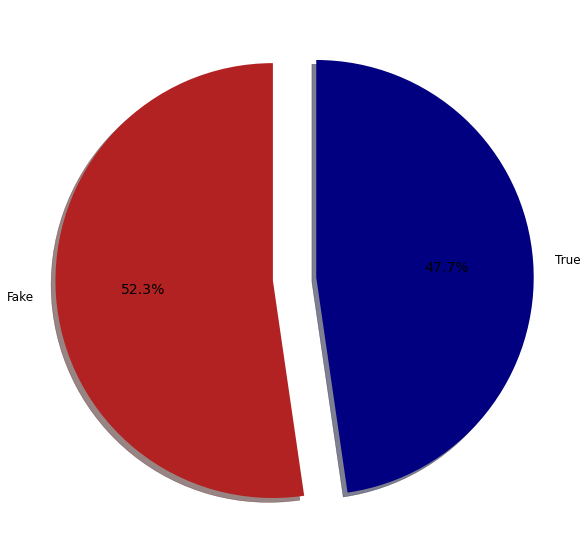

In [ ]:
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

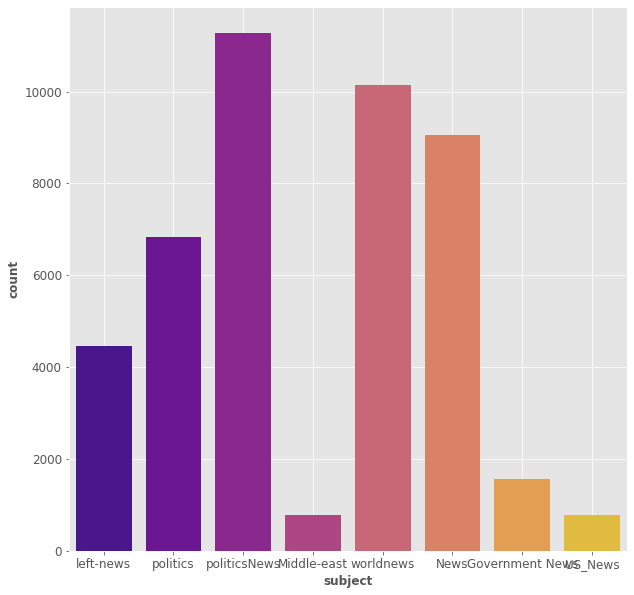

In [ ]:
sns.countplot(data.subject,palette='plasma')
plt.grid(True)

In [ ]:
subject_data = pd.get_dummies(data.subject)

In [ ]:
subject_data['Target']=pd.get_dummies(data.Target)['Fake']

In [ ]:
corr_data = abs(pd.DataFrame(subject_data.corr()['Target'])).drop('Target')

In [ ]:
corr_data

,Target
Government News,0.181797
Middle-east,0.126822
News,0.479858
US_News,0.127236
left-news,0.317132
politics,0.404915
politicsNews,0.606236
worldnews,0.565730


Text(0, 0.5, 'Correlation')

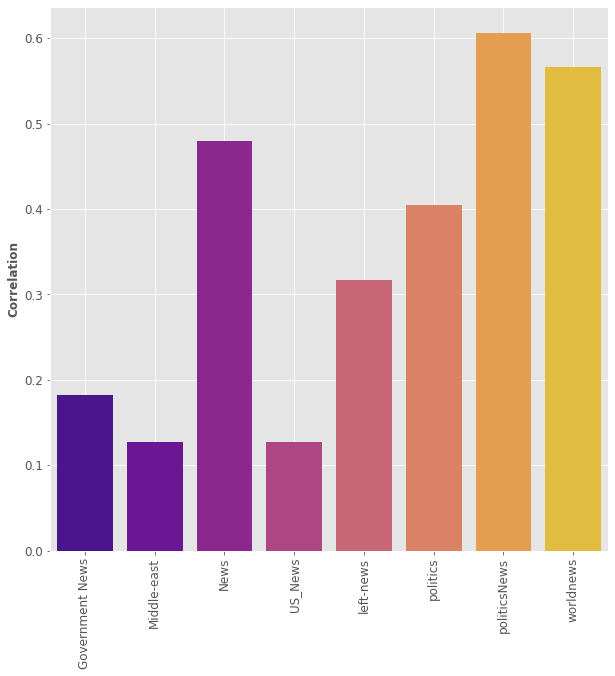

In [ ]:
sns.barplot(x=corr_data.index,y=corr_data.Target,palette='plasma')
plt.xticks(rotation=90)
plt.grid(True)
plt.ylabel('Correlation')

In [ ]:
import sklearn.preprocessing as preprocessing

In [ ]:
 from sklearn import preprocessing
 le = preprocessing.LabelEncoder()

In [ ]:
data['subjectenc']=le.fit_transform(data.subject.tolist())

In [ ]:
subject_data=pd.DataFrame(pd.get_dummies(data.Target)['Fake'])
subject_data['subjectenc']=data['subjectenc']

In [ ]:
subject_data.corr()

,Fake,subjectenc
Fake,1.0000,-0.8162
subjectenc,-0.8162,1.0000


In [ ]:
data.drop(columns=['subject'])

,title,text,date,Target,subjectenc
0,BREAKING: CLEVELAND POLICE CHIEF Asks Ohio Gov...,Obama s war on America just got real These act...,"Jul 17, 2016",Fake,4
1,"BREAKING: Democrat Congressman, Vocal ILLEGAL ...","Rep. Luis Guti rrez (Ill.), one of the most vo...","Nov 27, 2017",Fake,5
2,U.S. Senate panel approves Trump pick for top ...,WASHINGTON (Reuters) - The Republican-led U.S....,"July 20, 2017",True,6
3,What’s Really Behind the Senate’s Override of ...,21st Century Wire says While the US media fol...,"September 28, 2016",Fake,1
4,TOP FIVE Food Stamp Fraud Takedowns of 2017…Do...,After the Obama years of record food stamp us...,"Dec 30, 2017",Fake,4
...,...,...,...,...,...
44893,SHOCKING: Why Our Fed Government Will Grant “D...,"If we didn t know better, we d almost believe ...","Apr 7, 2015",Fake,4
44894,'Dreamer' immigration bill not on U.S. Senate ...,WASHINGTON (Reuters) - The U.S. Senate will no...,"December 18, 2017",True,6
44895,SUPREME COURT AGREES TO TAKE ON Obama’s Un-Ame...,"So far, the Supreme Court has not prevented on...","Jan 19, 2016",Fake,5
44896,"Trump Team Didn’t Just Collude with Israel, Ku...",Patrick Henningsen 21st Century WireMuch was m...,"December 7, 2017",Fake,1


In [ ]:
data['label']=pd.get_dummies(data.Target)['Fake']

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(data['title'], data['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=data['Target'])

In [ ]:
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)


Text(0, 0.5, 'Number of texts')

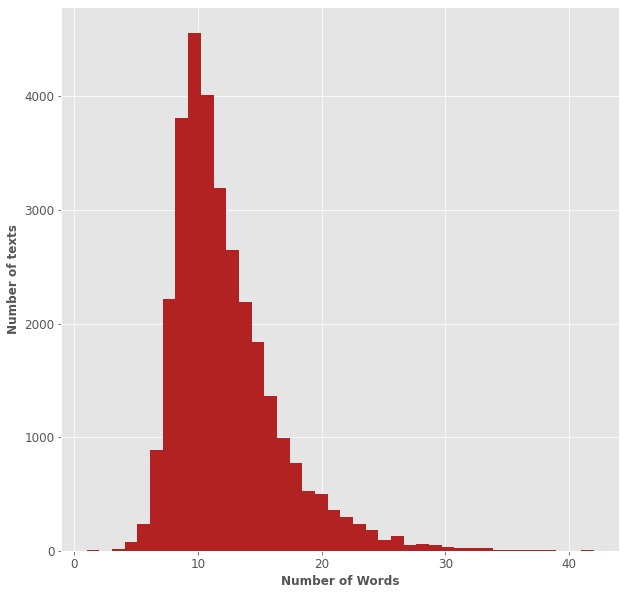

In [ ]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [ ]:
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
MAX_LENGHT = 15
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

In [ ]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_seq, train_mask, train_y)

train_sampler = RandomSampler(train_data)

train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_seq, val_mask, val_y)

val_sampler = SequentialSampler(val_data)

val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
for param in bert.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      self.dropout = nn.Dropout(0.1)
      
      self.relu =  nn.ReLU()

      self.fc1 = nn.Linear(768,512)
  
      self.fc2 = nn.Linear(512,2)

      self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id, mask):

      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      x = self.fc2(x)

      x = self.softmax(x)

      return x

In [ ]:
model = BERT_Arch(bert)

In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr = 1e-5)          

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', np.unique(train_labels), train_labels)

print("Class Weights:",class_weights)

Class Weights: [1.04815902 0.95607204]


In [ ]:
weights= torch.tensor(class_weights,dtype=torch.float)

cross_entropy  = nn.NLLLoss(weight=weights) 

epochs = 10

In [ ]:
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
 
  total_preds=[]

  for step,batch in enumerate(train_dataloader):

    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    batch = [r for r in batch]
    sent_id, mask, labels = batch

    model.zero_grad()        
 
    preds = model(sent_id, mask)

    loss = cross_entropy(preds, labels)

    total_loss = total_loss + loss.item()

    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    optimizer.step()

    preds=preds.detach().cpu().numpy()

    total_preds.append(preds)

  avg_loss = total_loss / len(train_dataloader)
  
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [ ]:
def evaluate():
  
  print("\nEvaluating...")

  model.eval()

  total_loss, total_accuracy = 0, 0

  total_preds = []

  for step,batch in enumerate(val_dataloader):

    if step % 50 == 0 and not step == 0:
      

      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    batch = [t for t in batch]

    sent_id, mask, labels = batch

    with torch.no_grad():

      preds = model(sent_id, mask)

      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  avg_loss = total_loss / len(val_dataloader) 

  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [ ]:
best_valid_loss = float('inf')

train_losses=[]
valid_losses=[]

for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    

    train_loss, _ = train()
    

    valid_loss, _ = evaluate()
    

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  Batch   650  of    983.
  Batch   700  of    983.
  Batch   750  of    983.
  Batch   800  of    983.
  Batch   850  of    983.
  Batch   900  of    983.
  Batch   950  of    983.

Evaluating...
  Batch    50  of    211.
  Batch   100  of    211.
  Batch   150  of    211.
  Batch   200  of    211.

Training Loss: 0.561
Validation Loss: 0.476

 Epoch 2 / 10
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.


In [ ]:
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

In [ ]:
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3213
           1       0.93      0.84      0.88      3522

    accuracy                           0.88      6735
   macro avg       0.88      0.88      0.88      6735
weighted avg       0.89      0.88      0.88      6735



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(preds,test_y)

array([[2988,  570],
       [ 225, 2952]])